In [ ]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 우리가 사용할 컴퓨터를 check하는 부분, cpu/gpu 지원 받을지...
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

In [ ]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

In [ ]:
# 하이퍼 파라미터들
input_size = 784  # 28 * 28 * 1 = 784 (픽셀을 1차원으로 늘린다.)
hidden_size = 500 # 은닉 계층의 unit 수(히든 레이어는 하나!)
num_classes = 10 # 카테고리의 개수(deep learning의 output의 카테고리 개수)
num_epochs = 5
batch_size = 100
learning_rate = 0.001

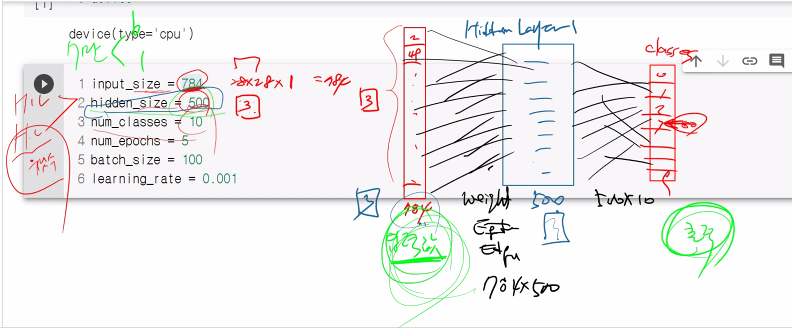

In [ ]:
# 데이터셋 로딩 -- 2번에 걸쳐서 로딩

# 1step(데이터 다운로드)
# train_dataset
train_dataset = torchvision.datasets.MNIST(root="../../data",
                                           train = True,
                                           transform = transforms.ToTensor(),
                                           download = True # 스케일링해서 다운로드하겠다.
                                           )
# test_dataset
test_dataset = torchvision.datasets.MNIST(root="../../data",
                                          train=False,
                                          transform = transforms.ToTensor()
                                          ) # 다운로드는 한번만 하면 된다.

# 2step...DataLoader...BatchSize를 이용함(네트워크로 Load - 모델,머신 안으로 로딩)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True
                                           ) 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size = batch_size,
                                           shuffle = False # 테스트할 때는 굳이 shuffle 필요 없음
                                           ) 

Model 생성하기

In [ ]:
class NeuralNet(nn.Module): # nn.module 상속 받아서 NeuralNet 클래스를 생성
    # 모델 설계
    def __init__(self,input_size, hidden_size, num_classes): # 생성자 역할
        super(NeuralNet,self).__init__()
        self.fc1 = nn.Linear(input_size,hidden_size) # fully connection
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size,num_classes)

    # 모델의 Forward Path를 정의
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)

        return out # 여기까지가 클래스 정의 부분

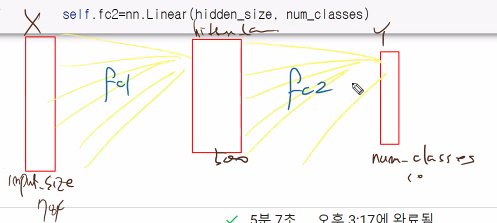

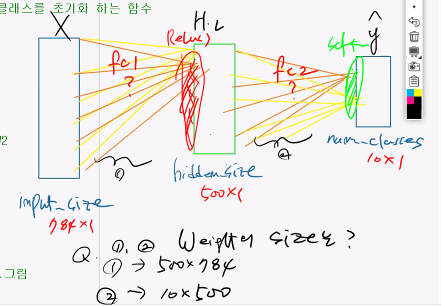

In [ ]:
# 위에서 정의한 클래스를 인스턴스화 시킴
model = NeuralNet(input_size, hidden_size, num_classes).to(device) # 이 model을 GPU 서버에서 돌리겠다.

# loss and optimizer를 선정의
loss_function = nn.CrossEntropyLoss() # Loss 기능 안에 Softmax 함수 기능이 포함되어져 있다.
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

total_step = len(train_loader) # 600번 로딩...600번 학습이 진행된다.

for epoch in range(num_epochs): # 5번...
    for i,(images,labels) in enumerate(train_loader): # for문이 100개씩 덩어리가 600번 돌아감
        # 네트워크에 넣어줄 때는 1차원으로 펼쳐서 넣는다.
        images = images.reshape(-1,28*28).to(device) # 네트워크에 넣어줄 때도 gpu로 돌린다.
        labels = labels.to(device)

        # Forward Path
        pred = model(images)
        loss = loss_function(pred,labels) 

        # Backward path
        optimizer.zero_grad()
        loss.backward()

        # 학습
        optimizer.step() # weight들을 업데이트

        # 학습이 진행되어 가는 과정 출력
        if (i+1) % 100 == 0:
            print("Epoch[{}/{}], step [{}/{}], Loss:{:.4f}".format(epoch+1,num_epochs,i+1,total_step,loss.item()))

In [ ]:
## Test Model에서는 필요한 구문이다.
'''
1) with torch.no_grad():
    some code
    ---> backward를 하지 않겠다.
2) with torch set_grad_enabled(False)

구문이 필요한 이유가
안해주면 기본적으로 BackPropagation을 진행할 것으로 알고 이에 해당하는 메모리를
따로 뺴둔다.
결과적으로 이 구문을 작성하지 않으면 메모리를 더 많이 먹는다.
'''

with torch.no_grad(): # 실제로 학습할 필요가 없을 때 이 구문을 반드시 작성해야 한다.
    correct = 0
    total = 0

    for images, labels in test_loader: # 100개씩 100번 돌아간다.
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)
        _,predicted = torch.max(outputs.data,1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print("Accuracy of the Network on the Test images : {} %".format(100*correct/total))

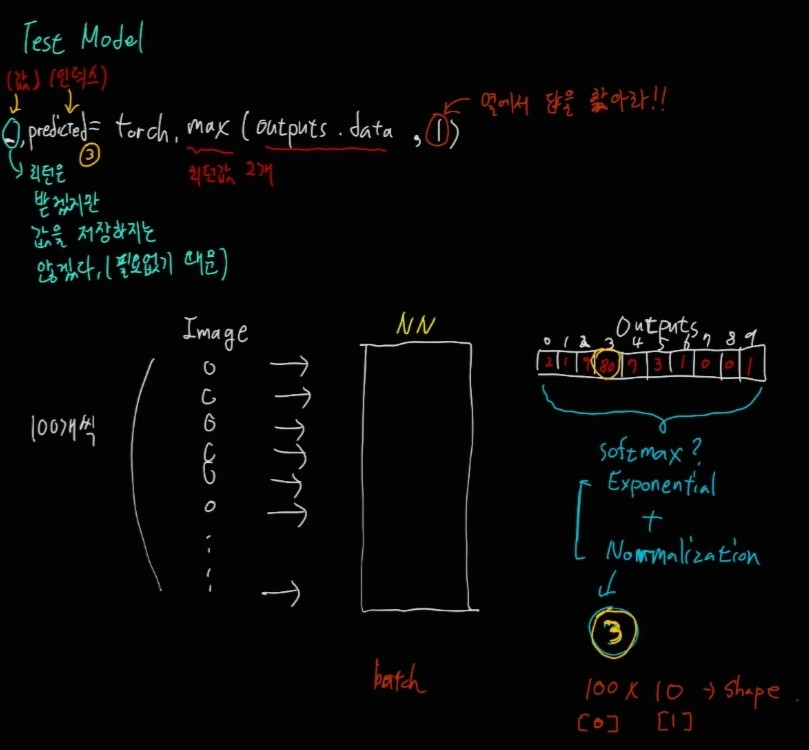

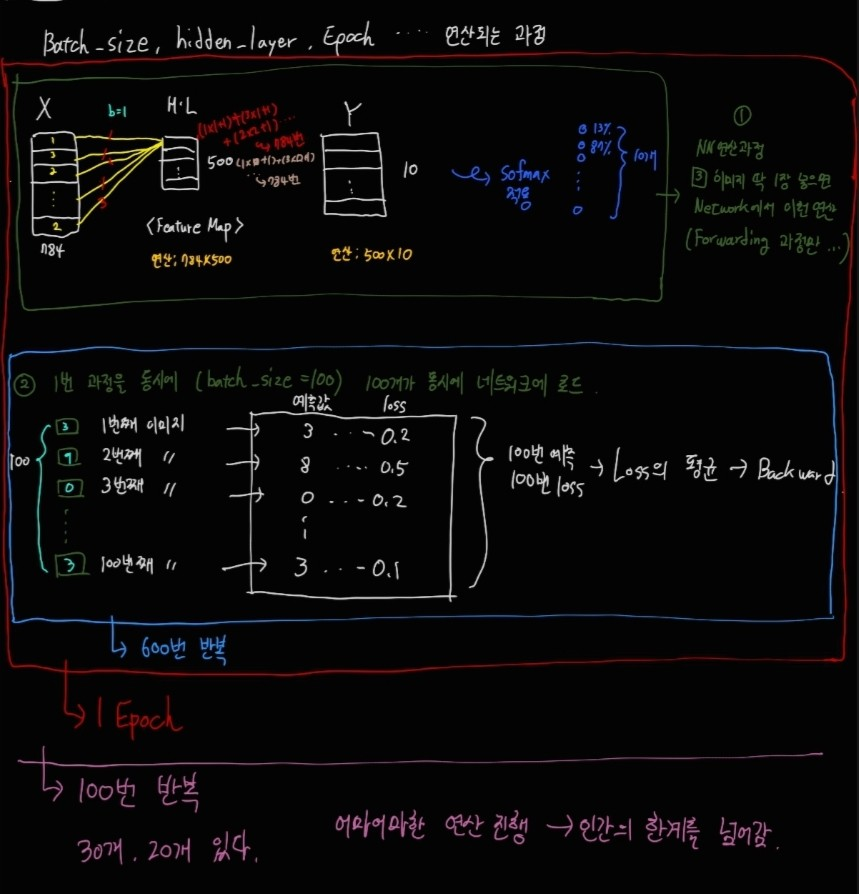

## 전체적인 틀

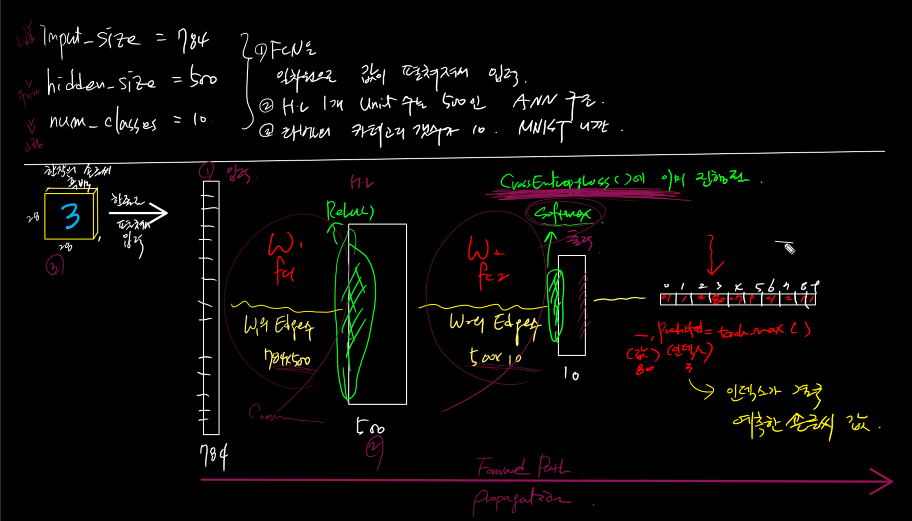